# Assignment 4 -  Regularized motion estimation
---
Group 3:
* Jiye Lee
* Eduardo Venegas Hernández
---


Local motion estimates are underdetermined due to the aperture problem: at each location, only motion in the direction of the grayscale gradient can be estimated. One approach to integrate motion estimates across locations is to increase the smoothness of the vector field
of motion estimates via a regularization term.
The Horn-Schunck algorithm (see lecture notes, part V, slides 6-13) uses the surface membrane property used in the previous task, but generalized to 2 dimensions.
1. Load the images taxi01.png and taxi02.png and compute the grayscale gradient:

$\nabla g = \begin{bmatrix}
g_x\\
g_y
\end{bmatrix}$
as well as the time derivative $g_t$.

2. Use the motion constraint equation $g_x · u + g_y · v + g_t = 0$ to calculate initial estimates
u and v for motion in x- and y-direction, respectively.
3. To smooth the flow field with a membrane constraint, use the numerical discretization
/ iteration scheme derived in the lecture slides:
- $u^{k+1} = u^{-k} − g_x * ( \frac{g_xu^{-k} + g_yv^{-k} + gt}{λ + g_x^2 + g_y^2} )$
- $vk+1 = v^{-k} − g_y * ( \frac{g_xu^{-k} + g_yv^{-k} + g_t}{λ + g_x^2 + g_y^2} )$
- where $U^{-k}$ and $v^{-k}$ are the results of applying a Laplace filter to $u^k$ and $v^k$
, respectively.
1. Apply the iteration scheme for 100 steps and show the evolution of the flow field over
iterations. Figure 1 shows motion estimates before and after regularization.

In [2]:
# import libraries
using Images, Plots

2-element Vector{Matrix{Gray{N0f8}}}:
 [Gray{N0f8}(0.431) Gray{N0f8}(0.427) … Gray{N0f8}(0.259) Gray{N0f8}(0.231); Gray{N0f8}(0.424) Gray{N0f8}(0.424) … Gray{N0f8}(0.357) Gray{N0f8}(0.322); … ; Gray{N0f8}(0.173) Gray{N0f8}(0.18) … Gray{N0f8}(0.286) Gray{N0f8}(0.31); Gray{N0f8}(0.188) Gray{N0f8}(0.196) … Gray{N0f8}(0.302) Gray{N0f8}(0.294)]
 [Gray{N0f8}(0.427) Gray{N0f8}(0.416) … Gray{N0f8}(0.263) Gray{N0f8}(0.216); Gray{N0f8}(0.424) Gray{N0f8}(0.424) … Gray{N0f8}(0.333) Gray{N0f8}(0.314); … ; Gray{N0f8}(0.173) Gray{N0f8}(0.188) … Gray{N0f8}(0.298) Gray{N0f8}(0.306); Gray{N0f8}(0.184) Gray{N0f8}(0.18) … Gray{N0f8}(0.302) Gray{N0f8}(0.298)]
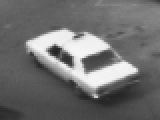
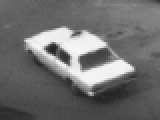

In [3]:
# load images taxi01.png and taxi02.png
img1 = Gray.(load("taxi01.png"))
img2 = Gray.(load("taxi02.png"))
[img1, img2]

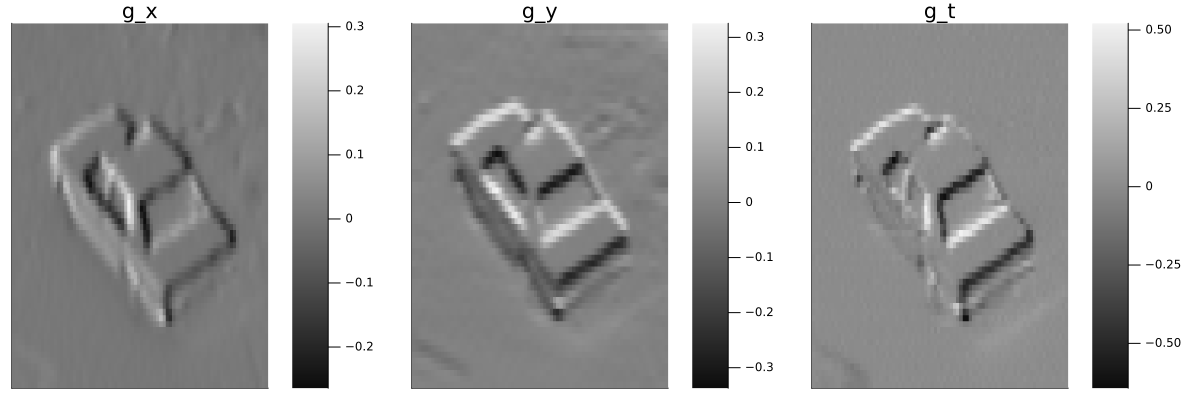

In [5]:
# compute the grayscale gradient:
s_y, s_x = Kernel.sobel()
g_x = imfilter(Float64.(img1), s_x)
g_y = imfilter(Float64.(img2), s_y)
g_t = Float64.(img2) - Float64.(img1)

h1 = heatmap(g_x, color=:grays, title="g_x", yflip=true, ticks=[])
h2 = heatmap(g_y, color=:grays, title="g_y", yflip=true, ticks=[])
h3 = heatmap(g_t, color=:grays, title="g_t", yflip=true, ticks=[])
plot(h1, h2, h3, layout=(1, 3), size=(1200,400))

### Motion constraint equation
- Motion constraint equation: grayscale profile shifts, but does not change.
- $g_x · u + g_y · v + g_t = 0$
- One equation, two uknonwns: underdetermined
- We only get motion in the direction of the grayscale gradient: $\Delta g = (g_x\ g_y)^T$
- $\big(\begin{smallmatrix}
  u\\
  v
\end{smallmatrix}\big)=-\frac{\Delta g*g_t}{||\Delta g||^2}$

In [6]:
magnitude = g_x.^2 + g_y.^2
divisor = max.(magnitude, 0.1 * maximum(magnitude)) # avoid division by zero
us = -g_x .* g_t ./ divisor
vs = -g_y .* g_t ./ divisor

60×80 Matrix{Float64}:
 -0.00013227    0.000396809   0.000529079  …  -0.0104493     0.0492043
  0.0           0.0          -0.000529079      0.143645      0.0518497
 -0.00211631   -0.00502625    0.00238085      -0.0190468    -0.0
 -0.00396809    0.0          -0.00317447       0.020105     -0.0
 -0.000793618   0.00105816    0.0              0.00648121    0.00648121
  0.000793618   0.0          -0.00357128   …  -0.00793618    0.00370355
  0.0           0.0          -0.00396809       0.00423263    0.0
 -0.00343901    0.00211631   -0.00105816       0.0           0.0
 -0.00145497    0.0           0.0             -0.00277766    0.000661348
  1.00052e-17   0.000925888   0.0              0.000793618   0.000396809
 -0.00198404    0.000661348  -0.00119043   …  -0.00158724   -0.0105816
 -0.00224858   -0.0          -0.0              0.0           0.00119043
  0.000661348  -0.00198404   -0.0222213        0.0          -0.00171951
  ⋮                                        ⋱                
  0.00634

### Basic Flow field from MCE

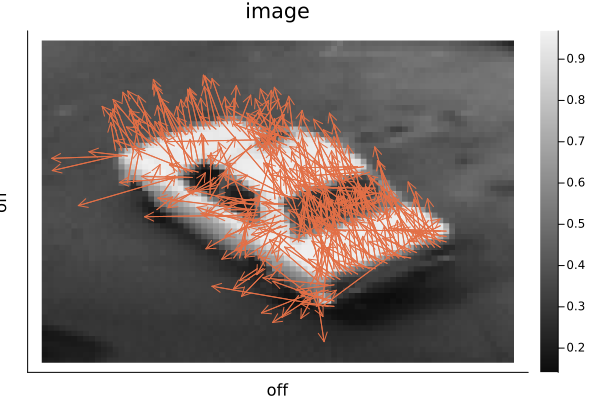

In [8]:
image = Float64.(img1)
heatmap(image[end:-1:1, :], color=:grays, title="image", ticks=[], axis="off")
xs = vec([index[2] for index in CartesianIndices(image)])
ys = vec([index[1] for index in CartesianIndices(image)])
e = 0.5
a = 5.0
inds = findall(vec(us .^ 2 + vs .^ 2 .> e))
quiver!(xs[inds], maximum(ys) .- ys[inds], quiver=(vec(us)[inds] .* a, vec(vs)[inds] .* -a))

### Horn-Schunck: membrane regularization

In [9]:
function hs_update(u, v, g_x, g_y, g_t; λ=0.1)
  laplace = [1 2 1; 2 0 2; 1 2 1] / 12
  u_bar = imfilter(u, laplace, "replicate")
  v_bar = imfilter(v, laplace, "replicate")
  u_new = u_bar - g_x .* (g_x .* u_bar + g_y .* v_bar + g_t) ./ (λ .+ g_x.^2 + g_y.^2)
  v_new = v_bar - g_y .* (g_x .* u_bar + g_y .* v_bar + g_t) ./ (λ .+ g_x.^2 + g_y.^2)
  return u_new, v_new
end

hs_update (generic function with 1 method)

### Iteration and visualization

In [17]:
function plot_hs(g_x, g_y, g_t, θ=0.01, e=0.5, a=5.0, steps=100, plotevery=1)
  # initialize with normal equaiton flow field
  magnitude = g_x.^2 + g_y.^2
  divisor = max.(magnitude, θ * maximum(magnitude)) # avoid division by zero
  us = -g_x .* g_t ./ divisor
  vs = -g_y .* g_t ./ divisor

  # set up animation
  xs = vec([index[2] for index in CartesianIndices(g_x)])
  ys = vec([index[1] for index in CartesianIndices(g_x)])
  animation = Animation()

  # run update loop
  for i in 1:steps
    if i % plotevery == 0
      inds = findall(vec(us .^ 2 + vs .^ 2 .> e))
      heatmap(magnitude, color=:grays)
      quiver!(xs[inds], ys[inds], quiver=(vec(us)[inds] .* a, vec(vs)[inds] .* a))
      frame(animation)
    end
    us, vs = hs_update(us, vs, g_x, g_y, g_t)
  end
  return animation, us, vs
end

plot_hs (generic function with 6 methods)

### Results

┌ Info: Saved animation to /home/lalo/Uni/CV/Assignment 4/hs.gif
└ @ Plots /home/lalo/.julia/packages/Plots/qgrW8/src/animation.jl:149


Plots.AnimatedGif("/home/lalo/Uni/CV/Assignment 4/hs.gif")
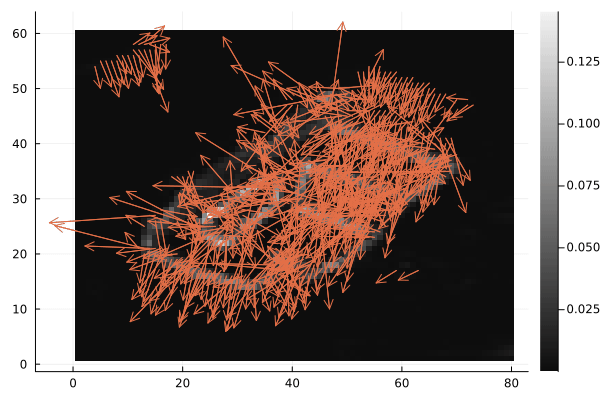

In [18]:
animation, us, vs = plot_hs(g_x, g_y, g_t)
gif(animation, "hs.gif", fps=10)